In [50]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [51]:
X = 1000
dataFrame = pd.read_csv("Data/processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [52]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


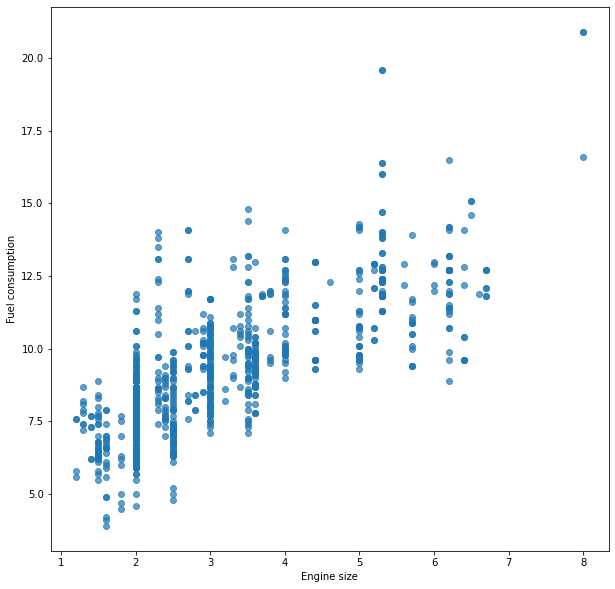

In [53]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

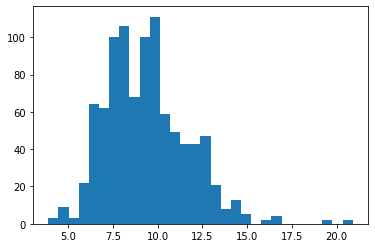

In [54]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [55]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']
fuel_consumption_data = dataFrame['Fuel Consumption(Hwy (L/100 km))']


In [56]:
model_1_prior=CmdStanModel(stan_file='Stan_files/model_1_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [57]:
samples_1_prior = model_1_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [58]:
dataFrame_model_1_prior = samples_1_prior.draws_pd()
dataFrame_model_1_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],fuel_consumption[4],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,16.62450,0.777181,-1.272270,2.12759,14.219300,17.69920,19.63680,21.90610,...,20.406100,18.83970,18.16190,17.89070,19.540900,23.55080,17.61950,18.74150,21.96760,22.95120
1,0.0,0.0,9.20844,0.457312,1.612690,1.78319,8.261550,13.33030,10.01320,14.59050,...,13.265400,11.93500,12.94670,12.44340,10.602100,11.53920,10.92580,12.79570,15.70010,9.50178
2,0.0,0.0,11.39010,0.912026,0.124858,2.58373,10.631000,15.24460,11.60650,11.96390,...,15.706100,21.72380,11.22340,14.73820,22.894600,16.24850,18.97400,20.04550,18.86400,17.94530
3,0.0,0.0,4.86689,-1.070230,-0.144217,1.24137,4.307780,4.17699,4.05143,6.20245,...,-0.215623,-1.59657,-2.81835,-1.64551,-0.555411,-1.32529,-1.41059,-2.95079,-3.42595,-3.90517
4,0.0,0.0,9.68974,0.517820,-0.533935,3.48873,0.833877,9.92886,1.92590,11.34880,...,11.033600,8.47153,12.38590,15.48150,11.702000,8.72725,8.09934,10.25610,11.87680,13.21150


In [59]:
model_1_post=CmdStanModel(stan_file='Stan_files/model_1_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [60]:
samples_1_post = model_1_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [61]:
model_2_prior=CmdStanModel(stan_file='Stan_files/model_2_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [62]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=X,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [63]:
model_2_post=CmdStanModel(stan_file='Stan_files/model_2_post.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [64]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=X,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [65]:
def calcQuants(x, y):
    qlvls = [0, 1]
    quansList = [[], []]
    for i in range(y.shape[-1]):
        temp = y[:, i]
        for q, lvl in zip(quansList, qlvls):
            q.append(np.quantile(temp, lvl))
    return quansList

def quantsExtremes(df, y, q):
    engine_uq = df['Engine Size(L)'].unique()
    engine_uq = sorted(engine_uq)
    quansList = calcQuants(df['Engine Size(L)'], y)
    engineQuantDict = dict()
    for engine_val in engine_uq:
        engineList = np.array(df['Engine Size(L)'].tolist())
        idxs = np.where(engineList == engine_val)[0]
        qval = quansList[q][idxs[0]]
        for i in idxs:
            if q == 0 and quansList[q][i] < qval:
                qval = quansList[q][i]
            elif q == 1 and quansList[q][i] > qval:
                qval = quansList[q][i]
        engineQuantDict[engine_val] = qval
    return engineQuantDict

<Figure size 720x432 with 0 Axes>

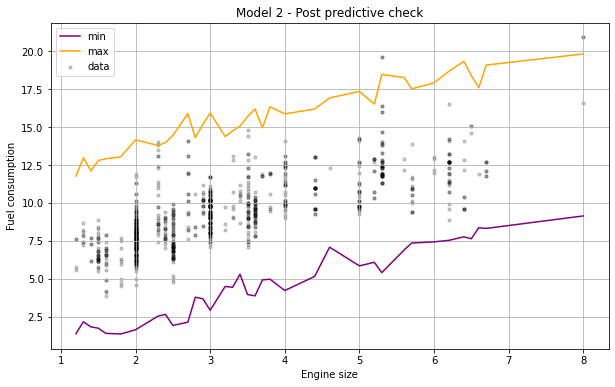

In [66]:
plt.figure(figsize=[10, 6])

price_sim = samples_1_post.stan_variable('y_out')

caratQuantMinDict = quantsExtremes(dataFrame, price_sim, 0)
caratMin = (caratQuantMinDict.keys())
quantMin = (caratQuantMinDict.values())

caratQuantMaxDict = quantsExtremes(dataFrame, price_sim, 1)
caratMax = (caratQuantMaxDict.keys())
quantMax = (caratQuantMaxDict.values())

plt.figure(figsize=[10, 6])
plt.plot(caratMin, quantMin, color='purple')
plt.plot(caratMax, quantMax, color='orange')
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'], color='black', alpha=0.2, s=10)
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.title("Model 2 - Post predictive check")
plt.legend(['min', 'max', 'data'])
plt.grid()
plt.show()

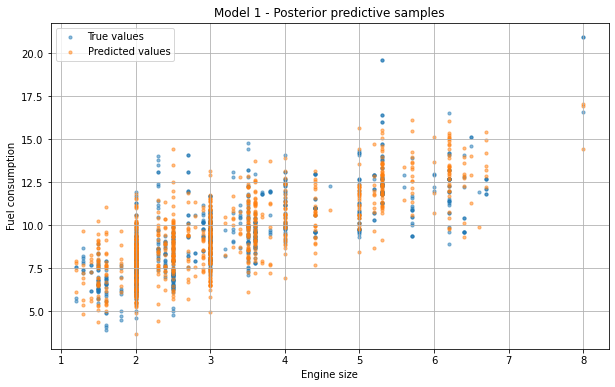

In [67]:

price_sim = samples_1_post.stan_variable('y_out')
plt.figure(figsize=[10,6])
plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.5, s=10)
plt.scatter(engine_size_data, price_sim[0], alpha=0.5, s=10)
plt.title("Model 1 - Posterior predictive samples")
plt.legend(["True values", "Predicted values"])
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.grid()
plt.show()

# dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
# samples_1_post['fuel_consumption'].plot.density(figsize=(10,6), linewidth=2, color='red')
# plt.title('Density plot for Price')
# plt.legend(["True values", "Predicted values"])
# plt.grid()
# plt.show()

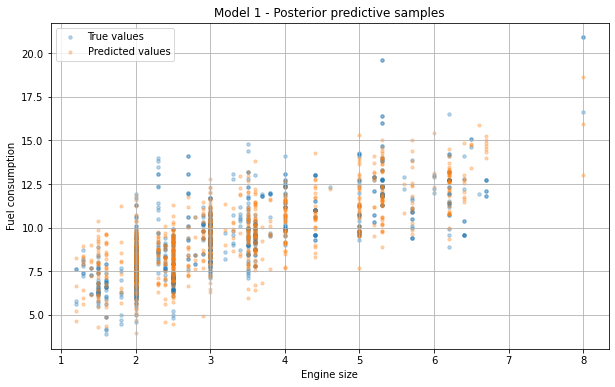

In [68]:

price_sim = samples_2_post.stan_variable('y_out')
plt.figure(figsize=[10,6])
plt.scatter(engine_size_data, fuel_consumption_data, alpha=0.3, s=12)
plt.scatter(engine_size_data, price_sim[0], alpha=0.3, s=10)
plt.title("Model 1 - Posterior predictive samples")
plt.legend(["True values", "Predicted values"])
plt.xlabel("Engine size")
plt.ylabel("Fuel consumption")
plt.grid()
plt.show()

# dataFrame['Fuel Consumption(Hwy (L/100 km))'].plot.density(figsize=(10,6), linewidth=2, color='red')
# for i in range(0,10):
#     price_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
# df_trim.price.plot.density(figsize=(10,6), linewidth=2, color='red')
# plt.title('Density plot for Price')
# plt.legend(["True values", "Predicted values"])
# plt.grid()
# plt.show()